### Results for marginal distributions for United Kingdom dataset 

- 14 cities
- Note in particular that for high amounts of rain, we can predict the occurence very well. Important for floods etc.

### Gamma model

In [1]:
### load gamma
model_version = 0
target_distribution = "gamma_hurdle"
base_nn = "HLSTM_tdscale" #(Keep this fixed)

# Run this to get the prediction data in a variable named city_data
# Getting data
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"Checkpoints/uk_rain_DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )
cities=['London', 'Cardiff', 'Glasgow', 'Manchester', 'Birmingham', 'Liverpool', 'Edinburgh', 'Dublin', 
'Preston', 'Truro', 'Bangor', 'Plymouth', 'Norwich', 'Salford']

gamma_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    gamma_allcities.append([i,location,city_data['pred_mu'],city_data['pred_disp'],city_data['pred_p'],city_data['target_rain_value']])
#[0:i,1:location,2:['pred_mu'],3:['pred_disp'],4:['pred_p'],5:['target_rain_value']


c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\Desktop\GNN UK daily\Notebooks\..\neural_nets.py:273: UserWarning: torch.range is deprecated and will be removed in a future release because its beha

In [3]:
### Gamma ROC

from sklearn.metrics import roc_curve, auc
from scipy.special import gamma
from math import exp
import numpy as np
import scipy.stats as scs

# Gamma: alpha = 1/disp, beta = alpha/mu


g_0mm=[]
g_0mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            g_0mm.append(1)
        else:
            g_0mm.append(0)
        #vetor of 'probability it rained this much'
        g_0mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(0.1))))

print('0 done')

g_5mm=[]
g_5mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            g_5mm.append(1)
        else:
            g_5mm.append(0)
        #vetor of 'probability it rained this much'
        g_5mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(5))))
print('5 done')


g_10mm=[]
g_10mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            g_10mm.append(1)
        else:
            g_10mm.append(0)
        #vetor of 'probability it rained this much'
        g_10mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(10))))
print('10 done')


g_15mm=[]
g_15mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            g_15mm.append(1)
        else:
            g_15mm.append(0)
        #vetor of 'probability it rained this much'
        g_15mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(15))))
print('15 done')


g_20mm=[]
g_20mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            g_20mm.append(1)
        else:
            g_20mm.append(0)
        #vetor of 'probability it rained this much'
        g_20mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(20))))
print('20 done')


g_25mm=[]
g_25mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            g_25mm.append(1)
        else:
            g_25mm.append(0)
        #vetor of 'probability it rained this much'
        g_25mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(25))))
print('25 done')

from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



0 done
5 done
10 done
15 done
20 done
25 done


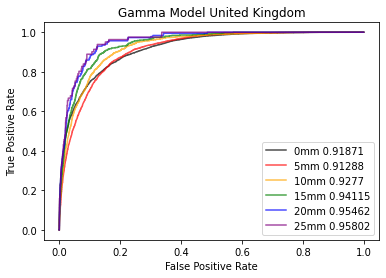

In [4]:
### GAMMA

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(g_0mm,g_0mm_cdfx)
auc0 = metrics.roc_auc_score(g_0mm,g_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(g_5mm,g_5mm_cdfx)
auc5 = metrics.roc_auc_score(g_5mm,g_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(g_10mm,g_10mm_cdfx)
auc10 = metrics.roc_auc_score(g_10mm,g_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(g_15mm,g_15mm_cdfx)
auc15 = metrics.roc_auc_score(g_15mm,g_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(g_20mm,g_20mm_cdfx)
auc20 = metrics.roc_auc_score(g_20mm,g_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(g_25mm,g_25mm_cdfx)
auc25 = metrics.roc_auc_score(g_25mm,g_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Gamma Model United Kingdom')
plt.savefig('ROC Gamma model UK')

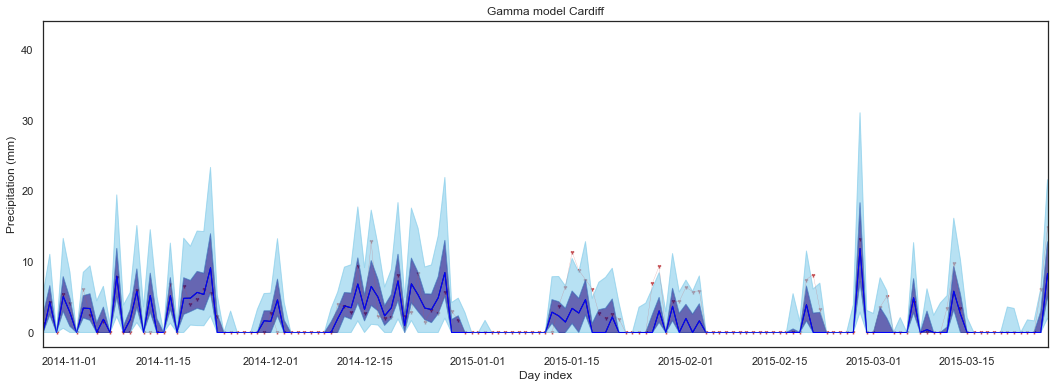

In [316]:
### plot for fit in Cardiff

# Median and 68, 95 percentiles for Cardiff
import math 

g_median = []
g_q25 = []
g_q75 = []
g_q68 = []
g_q95 = []
g_q32 = []
g_q05 = []

#0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates
for m,d,i in zip(gamma_allcities[1][2],gamma_allcities[1][3],range(len(gamma_allcities[1][4]))) :
    rv = scs.gamma(scale=m*d,a=1/d)  
      
    g_median.append(rv.ppf((gamma_allcities[1][4][i]-1+0.5)/gamma_allcities[1][4][i]))
    g_q25.append(rv.ppf((gamma_allcities[1][4][i]-1+0.25)/gamma_allcities[1][4][i]))
    g_q75.append(rv.ppf((gamma_allcities[1][4][i]-1+0.75)/gamma_allcities[1][4][i]))
    g_q68.append(rv.ppf((gamma_allcities[1][4][i]-1+0.68)/gamma_allcities[1][4][i]))
    g_q95.append(rv.ppf((gamma_allcities[1][4][i]-1+0.95)/gamma_allcities[1][4][i]))
    g_q32.append(rv.ppf((gamma_allcities[1][4][i]-1+0.32)/gamma_allcities[1][4][i]))
    g_q05.append(rv.ppf((gamma_allcities[1][4][i]-1+0.05)/gamma_allcities[1][4][i]))

for q in [g_median,g_q25,g_q05,g_q32,g_q68,g_q75,g_q95]:
    for i in range(len(q)):
        if math.isnan(q[i]):
            q[i]=0
            
plt.figure(figsize=(18, 6))
plt.scatter(test_output['Cardiff']['date'],gamma_allcities[1][5],color='r',marker='1',s=16)
plt.plot(test_output['Cardiff']['date'],gamma_allcities[1][5],color='r',alpha=0.5,linewidth=0.3)
plt.plot(test_output['Cardiff']['date'],g_q05,color='skyblue',linewidth=0.6,alpha=0.3)
plt.plot(test_output['Cardiff']['date'],g_q25,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(test_output['Cardiff']['date'],g_median,color='blue',linewidth=1,alpha=1)
plt.plot(test_output['Cardiff']['date'],g_q75,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(test_output['Cardiff']['date'],g_q95,color='skyblue',linewidth=0.6,alpha=0.3)
plt.fill_between(test_output['Cardiff']['date'], g_median, g_q75, where=([g_median[k] < g_q75[k] for k in range(len(gamma_allcities[1][5]))]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between(test_output['Cardiff']['date'], g_median, g_q25, where=([g_median[k] > g_q25[k] for k in range(len(gamma_allcities[1][5]))]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between(test_output['Cardiff']['date'], g_q95, g_q75, where=([g_q95[k] > g_q75[k] for k in range(len(gamma_allcities[1][5]))]), color='skyblue', alpha=0.6,interpolate=True)
plt.fill_between(test_output['Cardiff']['date'], g_q05, g_q25, where=([g_q05[k] < g_q25[k] for k in range(len(gamma_allcities[1][5]))]), color='skyblue', alpha=0.6,interpolate=True)
plt.xlim([test_output['Cardiff']['date'][300],test_output['Cardiff']['date'][450]])
plt.title('Gamma model Cardiff')
plt.xlabel('Day index')
plt.ylabel('Precipitation (mm)')
plt.savefig('Gamma_Cardiff')

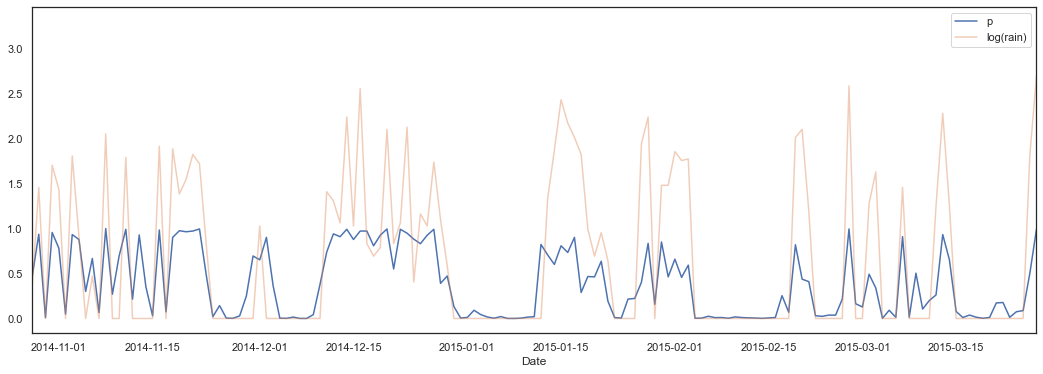

In [322]:
#p plot gamma
import numpy as np
plt.figure(figsize=(18, 6))
plt.plot(test_output['Cardiff']['date'],gamma_allcities[1][4])
plt.plot(test_output['Cardiff']['date'],[0 if rain<1 else np.log(rain) for rain in gamma_allcities[1][5]],'-',alpha=0.4)
plt.xlabel('Date')
plt.xlim([test_output['Cardiff']['date'][300],test_output['Cardiff']['date'][450]])
plt.legend(['p','log(rain)'],facecolor='white')
plt.savefig('gamma_p_UK')


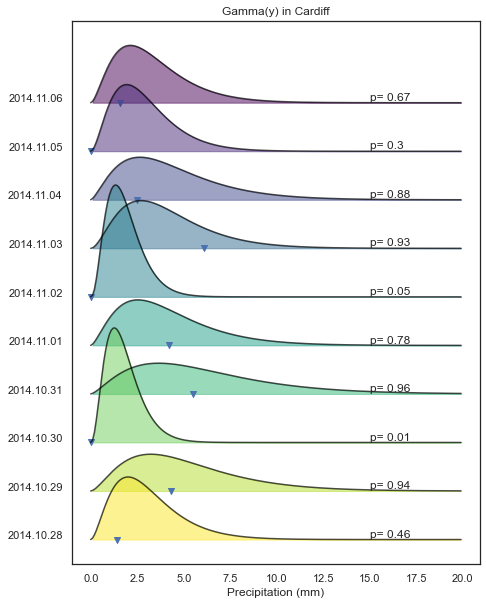

In [311]:
### densities plots
import matplotlib
import pandas as pd
import sklearn.preprocessing
x=[i/10 for i in range(200)]

plt.figure(figsize=(7.3, 10))
colors = matplotlib.cm.viridis(np.linspace(0, 1, len(range(300,310))))
for idx,col in zip(range(309,299,-1),colors):
    rv=scs.gamma(scale=gamma_allcities[1][3][idx]*gamma_allcities[1][2][idx],a=1/gamma_allcities[1][3][idx])
    level=((idx-300)*0.2)
    plt.plot(x,level+rv.pdf(x),color='black',alpha=0.7)
    plt.fill_between(x,y1=level+rv.pdf(x),y2=level,where=([level+rv.pdf(x_)>level for x_ in x]),color=col,alpha=0.5)
    plt.text(15,level+0.01,'p= '+str(round(gamma_allcities[1][4][idx],2)))
    plt.scatter(gamma_allcities[1][5][idx],level,marker='v',color='b')
plt.xlabel('Precipitation (mm)')
plt.yticks([0.02+0.2*k for k in range(10)],[pd.to_datetime(str(i)).strftime('%Y.%m.%d') for i in test_output['Cardiff']['date'][300:310]])
plt.title('Gamma(y) in Cardiff')
plt.savefig('Cardiff_gamma_dists')


### Log-Normal model

In [13]:
### load lognormal
model_version = 0
target_distribution = "lognormal_hurdle"
base_nn = "HLSTM_tdscale" #(Keep this fixed)

path_ = f"Checkpoints/uk_rain_DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )


lognormal_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    lognormal_allcities.append([i,location,city_data['pred_mu'],city_data['pred_disp'],city_data['pred_p'],city_data['target_rain_value']])
#[0:i,1:location,2:['pred_mu'],3:['pred_disp'],4:['pred_p'],5:['target_rain_value']

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\Desktop\GNN UK daily\Notebooks\..\neural_nets.py:273: UserWarning: torch.range is deprecated and will be removed in a future release because its beha

In [16]:
### Log-Normal ROC

from sklearn.metrics import roc_curve, auc
from math import exp
import numpy as np
import scipy.stats as scs

# Lognormal: mu=mu, disp=sigma

log_0mm=[]
log_0mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            log_0mm.append(1)
        else:
            log_0mm.append(0)
        #vetor of 'probability it rained this much'
        log_0mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(0.1))))
print('0 done')
 
log_5mm=[]
log_5mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            log_5mm.append(1)
        else:
            log_5mm.append(0)
        #vetor of 'probability it rained this much'
        log_5mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(5))))
print('5 done')

log_10mm=[]
log_10mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            log_10mm.append(1)
        else:
            log_10mm.append(0)
        #vetor of 'probability it rained this much'
        log_10mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(10))))
print('10 done')


log_15mm=[]
log_15mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            log_15mm.append(1)
        else:
            log_15mm.append(0)
        #vetor of 'probability it rained this much'
        log_15mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(15))))
print('15 done')


log_20mm=[]
log_20mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            log_20mm.append(1)
        else:
            log_20mm.append(0)
        #vetor of 'probability it rained this much'
        log_20mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(20))))
print('20 done')


log_25mm=[]
log_25mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            log_25mm.append(1)
        else:
            log_25mm.append(0)
        #vetor of 'probability it rained this much'
        log_25mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(25))))
print('25 done')

0 done
5 done
10 done
15 done
20 done
25 done


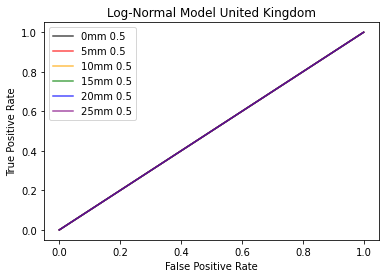

In [17]:
### plot ROC
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### lognormal

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(log_0mm,log_0mm_cdfx)
auc0 = metrics.roc_auc_score(log_0mm,log_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(log_5mm,log_5mm_cdfx)
auc5 = metrics.roc_auc_score(log_5mm,log_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(log_10mm,log_10mm_cdfx)
auc10 = metrics.roc_auc_score(log_10mm,log_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(log_15mm,log_15mm_cdfx)
auc15 = metrics.roc_auc_score(log_15mm,log_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(log_20mm,log_20mm_cdfx)
auc20 = metrics.roc_auc_score(log_20mm,log_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(log_25mm,log_25mm_cdfx)
auc25 = metrics.roc_auc_score(log_25mm,log_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Log-Normal Model United Kingdom')
plt.savefig('ROC Log-Normal model_UK')

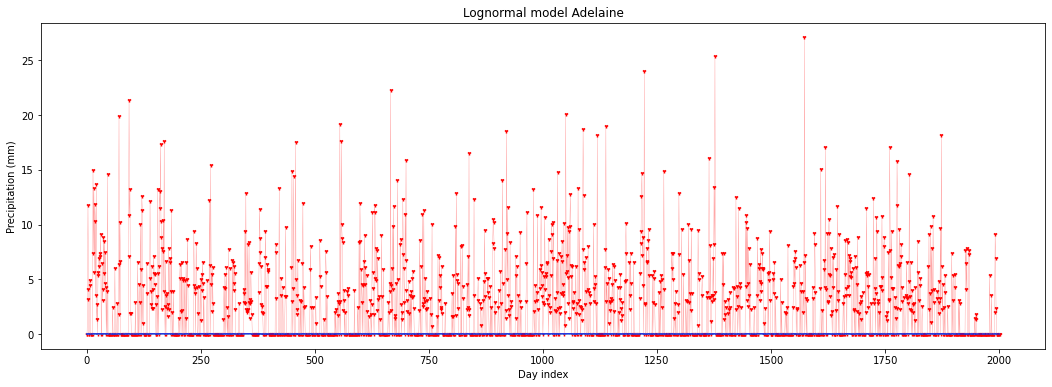

In [18]:
# Median and 68, 95 percentiles for Cardiff
import math 

log_median = []
log_q25 = []
log_q75 = []
log_q68 = []
log_q95 = []
log_q32 = []
log_q05 = []

###0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates
for m,d,i in zip(lognormal_allcities[1][2],lognormal_allcities[1][3],range(len(lognormal_allcities[1][4]))) :
    rv = scs.lognorm(s=d,scale=np.exp(m))  

    log_median.append(rv.ppf((lognormal_allcities[1][4][i]-1+0.5)/lognormal_allcities[1][4][i]))
    log_q25.append(rv.ppf((lognormal_allcities[1][4][i]-1+0.25)/lognormal_allcities[1][4][i]))
    log_q75.append(rv.ppf((lognormal_allcities[1][4][i]-1+0.75)/lognormal_allcities[1][4][i]))
    log_q95.append(rv.ppf((lognormal_allcities[1][4][i]-1+0.95)/lognormal_allcities[1][4][i]))
    log_q05.append(rv.ppf((lognormal_allcities[1][4][i]-1+0.05)/lognormal_allcities[1][4][i]))

for q in [log_median,log_q25,log_q05,log_q75,log_q95]:
    for i in range(len(q)):
        if math.isnan(q[i]):
            q[i]=0

plt.figure(figsize=(18, 6))
plt.scatter([i for i in range(len(lognormal_allcities[1][5]))],lognormal_allcities[1][5],color='r',marker='1',s=16)
plt.plot(lognormal_allcities[1][5],color='r',alpha=0.5,linewidth=0.3)
plt.plot(log_q05,color='skyblue',linewidth=0.6,alpha=0.3)
plt.plot(log_q25,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(log_median,color='blue',linewidth=1,alpha=1)
plt.plot(log_q75,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(log_q95,color='skyblue',linewidth=0.6,alpha=0.3)
plt.fill_between([i for i in range(len(lognormal_allcities[1][5]))], log_median, log_q75, where=([log_median[k] < log_q75[k] for k in range(len(lognormal_allcities[1][5]))]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between([i for i in range(len(lognormal_allcities[1][5]))], log_median, log_q25, where=([log_median[k] > log_q25[k] for k in range(len(lognormal_allcities[1][5]))]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between([i for i in range(len(lognormal_allcities[1][5]))], log_q95, log_q75, where=([log_q95[k] > log_q75[k] for k in range(len(lognormal_allcities[1][5]))]), color='skyblue', alpha=0.6,interpolate=True)
plt.fill_between([i for i in range(len(lognormal_allcities[1][5]))], log_q05, log_q25, where=([log_q05[k] < log_q25[k] for k in range(len(lognormal_allcities[1][5]))]), color='skyblue', alpha=0.6,interpolate=True)
#plt.xlim([650,800])
plt.title('Lognormal model Adelaine')
plt.xlabel('Day index')
plt.ylabel('Precipitation (mm)')
plt.savefig('Lognormal_Adelaine')

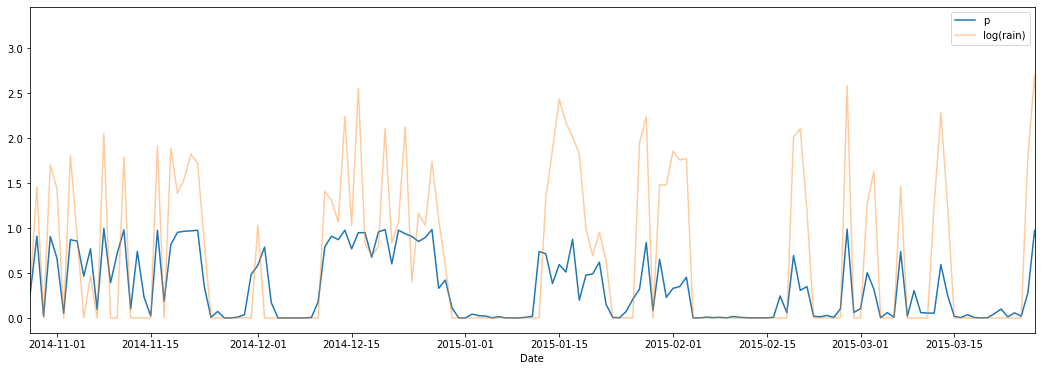

In [69]:
#p plot lognormal
import numpy as np
plt.figure(figsize=(18, 6))
plt.plot(test_output['Cardiff']['date'],lognormal_allcities[1][4])
plt.plot(test_output['Cardiff']['date'],[0 if rain<1 else np.log(rain) for rain in lognormal_allcities[1][5]],'-',alpha=0.4)
#plt.xlim([300,450])
plt.xlabel('Date')
plt.xlim([test_output['Cardiff']['date'][300],test_output['Cardiff']['date'][450]])
plt.legend(['p','log(rain)'])
plt.savefig('lognormal_p_UK')

### Compound Poisson model

In [70]:
### load lognormal
model_version = 1
target_distribution = "compound_poisson"
base_nn = "HLSTM_tdscale" #(Keep this fixed)

path_ = f"Checkpoints/uk_rain_DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )


cp_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    cp_allcities.append([i,location,city_data['pred_mu'],city_data['pred_disp'],city_data['pred_p'],city_data['target_rain_value']])
#[0:i,1:location,2:['pred_mu'],3:['pred_disp'],4:['pred_p'],5:['target_rain_value']

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\Desktop\GNN UK daily\Notebooks\..\neural_nets.py:273: UserWarning: torch.range is deprecated and will be removed in a future release because its beha

In [73]:
### CP ROC
#[0:i,1:location,2:['pred_mu'],3:['pred_disp'],4:['pred_p'],5:['target_rain_value']
from sklearn.metrics import roc_curve, auc
from math import exp
import numpy as np
import scipy.stats as scs
import tweedie 

# Lognormal: mu=mu, disp=sigma

cp_0mm=[]
cp_0mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            cp_0mm.append(1)
        else:
            cp_0mm.append(0)
        #vetor of 'probability it rained this much'
        cp_0mm_cdfx.append(1-tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(0.1))
print('0 done')

cp_5mm=[]
cp_5mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            cp_5mm.append(1)
        else:
            cp_5mm.append(0)
        #vetor of 'probability it rained this much'
        cp_5mm_cdfx.append(1-tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(5))
print('5 done')

cp_10mm=[]
cp_10mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            cp_10mm.append(1)
        else:
            cp_10mm.append(0)
        #vetor of 'probability it rained this much'
        cp_10mm_cdfx.append(1-tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(10))
print('10 done')


cp_15mm=[]
cp_15mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            cp_15mm.append(1)
        else:
            cp_15mm.append(0)
        #vetor of 'probability it rained this much'
        cp_15mm_cdfx.append(1-tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(15))
print('15 done')


cp_20mm=[]
cp_20mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            cp_20mm.append(1)
        else:
            cp_20mm.append(0)
        #vetor of 'probability it rained this much'
        cp_20mm_cdfx.append(1-tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(20))
print('20 done')


cp_25mm=[]
cp_25mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            cp_25mm.append(1)
        else:
            cp_25mm.append(0)
        #vetor of 'probability it rained this much'
        cp_25mm_cdfx.append(1-tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(25))
print('25 done')

0 done
5 done
10 done
15 done
20 done
25 done


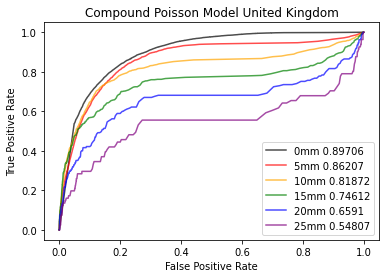

In [74]:
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### CP

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(cp_0mm,cp_0mm_cdfx)
auc0 = metrics.roc_auc_score(cp_0mm,cp_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(cp_5mm,cp_5mm_cdfx)
auc5 = metrics.roc_auc_score(cp_5mm,cp_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(cp_10mm,cp_10mm_cdfx)
auc10 = metrics.roc_auc_score(cp_10mm,cp_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(cp_15mm,cp_15mm_cdfx)
auc15 = metrics.roc_auc_score(cp_15mm,cp_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(cp_20mm,cp_20mm_cdfx)
auc20 = metrics.roc_auc_score(cp_20mm,cp_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(cp_25mm,cp_25mm_cdfx)
auc25 = metrics.roc_auc_score(cp_25mm,cp_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Compound Poisson Model United Kingdom')
plt.savefig('ROC CP model_UK')




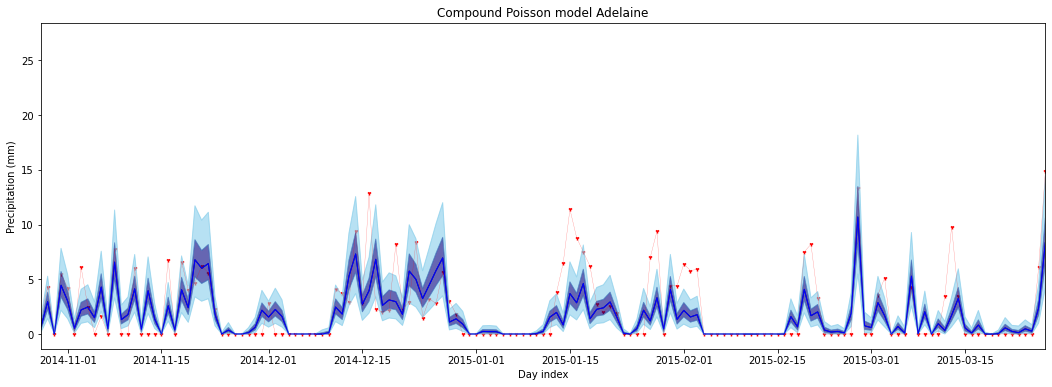

In [75]:
import math 

cp_median = []
cp_q25 = []
cp_q75 = []
cp_q68 = []
cp_q95 = []
cp_q32 = []
cp_q05 = []

###0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates
for m,d,i in zip(cp_allcities[1][2],cp_allcities[1][3],range(len(cp_allcities[1][4]))) :
    rv = tweedie.tweedie(mu=m,p=cp_allcities[1][4][i],phi=d) 

    cp_median.append(rv.ppf(0.5))
    cp_q25.append(rv.ppf(0.25))
    cp_q75.append(rv.ppf(0.75))
    cp_q95.append(rv.ppf(0.95))
    cp_q05.append(rv.ppf(0.05))

for q in [cp_median,cp_q25,cp_q05,cp_q75,cp_q95]:
    for i in range(len(q)):
        if math.isnan(q[i]):
            q[i]=0

plt.figure(figsize=(18, 6))
plt.scatter(test_output['Cardiff']['date'],cp_allcities[1][5],color='r',marker='1',s=16)
plt.plot(test_output['Cardiff']['date'],cp_allcities[1][5],color='r',alpha=0.5,linewidth=0.3)
plt.plot(test_output['Cardiff']['date'],cp_q05,color='skyblue',linewidth=0.6,alpha=0.3)
plt.plot(test_output['Cardiff']['date'],cp_q25,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(test_output['Cardiff']['date'],cp_median,color='blue',linewidth=1,alpha=1)
plt.plot(test_output['Cardiff']['date'],cp_q75,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(test_output['Cardiff']['date'],cp_q95,color='skyblue',linewidth=0.6,alpha=0.3)
plt.fill_between(test_output['Cardiff']['date'], cp_median, cp_q75, where=([cp_median[k] < cp_q75[k] for k in range(len(cp_allcities[1][5]))]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between(test_output['Cardiff']['date'], cp_median, cp_q25, where=([cp_median[k] > cp_q25[k] for k in range(len(cp_allcities[1][5]))]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between(test_output['Cardiff']['date'], cp_q95, cp_q75, where=([cp_q95[k] > cp_q75[k] for k in range(len(cp_allcities[1][5]))]), color='skyblue', alpha=0.6,interpolate=True)
plt.fill_between(test_output['Cardiff']['date'], cp_q05, cp_q25, where=([cp_q05[k] < cp_q25[k] for k in range(len(cp_allcities[1][5]))]), color='skyblue', alpha=0.6,interpolate=True)
plt.xlim([test_output['Cardiff']['date'][300],test_output['Cardiff']['date'][450]])
plt.title('Compound Poisson model Adelaine')
plt.xlabel('Day index')
plt.ylabel('Precipitation (mm)')
plt.savefig('cp_Adelaine')

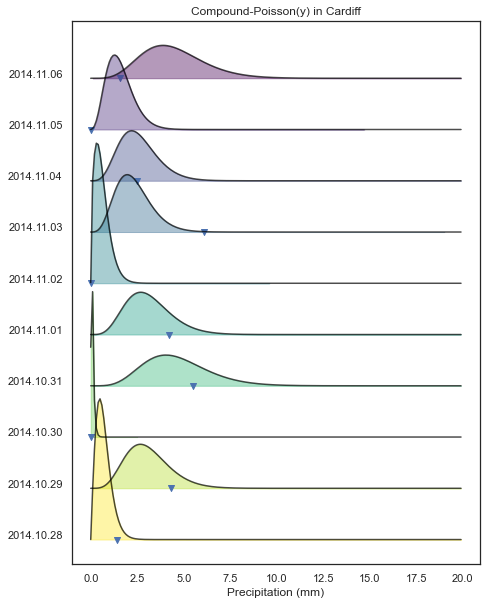

In [312]:
import matplotlib
import pandas as pd
import sklearn.preprocessing
x=[i/10 for i in range(200)]

plt.figure(figsize=(7.3, 10))
colors = matplotlib.cm.viridis(np.linspace(0, 1, len(range(300,310))))
for idx,col in zip(range(309,299,-1),colors):
    rv=tweedie.tweedie(mu=cp_allcities[1][2][idx],p=cp_allcities[1][4][idx],phi=cp_allcities[1][3][idx])
    level=((idx-300)*0.4)
    plt.plot(x,level+rv.pdf(x),color='black',alpha=0.7)
    plt.fill_between(x,y1=level+rv.pdf(x),y2=level,where=([level+rv.pdf(x_)>level for x_ in x]),color=col,alpha=0.4)
    plt.scatter(cp_allcities[1][5][idx],level,marker='v',color='b')

plt.xlabel('Precipitation (mm)')
plt.yticks([0.04+0.4*k for k in range(10)],[pd.to_datetime(str(i)).strftime('%Y.%m.%d') for i in test_output['Cardiff']['date'][300:310]])
plt.title('Compound-Poisson(y) in Cardiff')
plt.savefig('Cardiff_CP_dists')


### Overall results

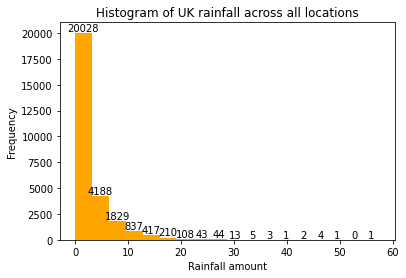

In [80]:
### Hist of rain
import numpy as np
import matplotlib.pyplot as plt

all_rain=np.array([])
#0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates
for idx,place in enumerate(cities):
    all_rain=np.concatenate((all_rain,gamma_allcities[idx][5]))
counts, edges, bars = plt.hist(all_rain,color='orange',bins=18)

plt.bar_label(bars)
plt.title('Histogram of UK rainfall across all locations')
plt.xlabel('Rainfall amount')
plt.ylabel('Frequency')
plt.savefig('Hist UK')

In [ ]:
### P(rain<x) - take median as predicted rain, and use that to do ecdf

import scipy.stats as scs
#gamma
g_median_all=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        if place[4][day]>0.5:
            g_median_all.append(scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).ppf((place[4][day]-0.5)/place[4][day]))
        else:   
            g_median_all.append(0)


#lognormal
#log_median_all=[]

#for place in lognormal_allcities:
#    for day in range(len(place[5])):
#        if place[4][day]>0.5:
#            log_median_all.append(scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).ppf((place[4][day]-0.5)/place[4][day]))
#        else:      
#            log_median_all.append(0)

#CP
cp_median_all=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        cp_median_all.append(tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).ppf(0.5))
            



#probability of precipitation > x
from matplotlib import pyplot as plt 

import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

#empirical cdf
allrain=np.array([])
for place in gamma_allcities:
    allrain=np.concatenate((allrain,place[5]))
ecdf=ECDF(allrain)
#alternative with median
#log_med_ecdf=ECDF(log_median_all)
g_med_ecdf=ECDF(g_median_all)
cp_med_ecdf=ECDF(cp_median_all)




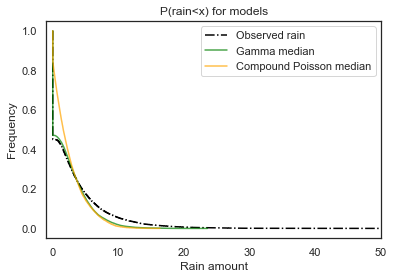

In [327]:
plt.plot(ecdf.x, 1-ecdf.y,'-.',color='black')
#plt.plot(log_med_ecdf.x,1-log_med_ecdf.y,color='royalblue',alpha=0.7)
plt.plot(g_med_ecdf.x,1-g_med_ecdf.y,color='green',alpha=0.7)
plt.plot(cp_med_ecdf.x,1-cp_med_ecdf.y,color='orange',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.title('P(rain<x) for models')
plt.legend(['Observed rain','Gamma median','Compound Poisson median'],facecolor='white')
plt.savefig('diagnost_figure_c')

In [ ]:
'''plt.plot(ecdf.x, 1-ecdf.y,'-.',color='black')
plt.plot(log_med_ecdf.x,1-log_med_ecdf.y,color='royalblue',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.legend(['Observed rain','Log-Normal median'])
plt.savefig('diagnost_figure_c_lognorm')'''

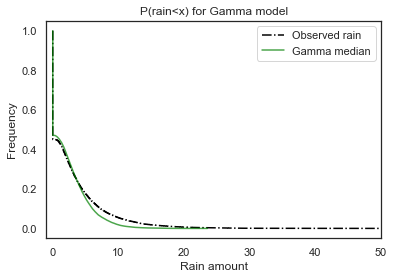

In [328]:
plt.plot(ecdf.x, 1-ecdf.y,'-.',color='black')
plt.plot(g_med_ecdf.x,1-g_med_ecdf.y,color='green',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.title('P(rain<x) for Gamma model')
plt.legend(['Observed rain','Gamma median'],facecolor='white')
plt.savefig('diagnost_figure_c_gamma')

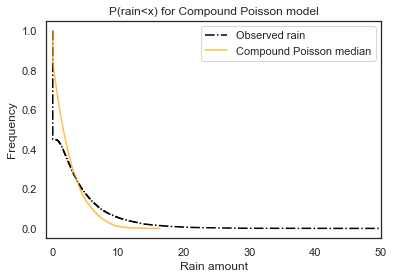

In [329]:
plt.plot(ecdf.x, 1-ecdf.y,'-.',color='black')
plt.plot(cp_med_ecdf.x,1-cp_med_ecdf.y,color='orange',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.title('P(rain<x) for Compound Poisson model')
plt.legend(['Observed rain','Compound Poisson median'],facecolor='white')
plt.savefig('diagnost_figure_c_cp')

### RMSB and MAB


In [84]:
import numpy as np

def rmsb(med,obs):
    return np.sum([ np.sqrt(np.power(m-o,2)/(len(med)))  for m,o in zip(med,obs)])

def mab(med,obs):
    return np.sum([ (abs(m-o))/len(med)  for m,o in zip(med,obs)])
        
print(['gamma: RMSB, MAB',rmsb(g_median_all,all_rain),mab(g_median_all,all_rain)])
#print(['lognormal: RMSB, MAB',rmsb(log_median_all,all_rain),mab(log_median_all,all_rain)])
print(['cp: RMSB, MAB',rmsb(cp_median_all,all_rain),mab(cp_median_all,all_rain)])

['gamma: RMSB, MAB', 240.12648534338874, 1.4418955737937948]
['cp: RMSB, MAB', 289.6424191957621, 1.739225565326814]
